## WaterPump_Classification

This DrivenData competition: for identification of Tanzmanian govertment's water data

dataset link: https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv('Training set values.csv')
data.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [4]:
labels=pd.read_csv('Training set labels.csv')
labels.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [5]:
train=data.copy()

In [6]:
train.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group'],
      dtype='object')

In [7]:
train.shape

(59400, 40)

In [8]:
train=pd.merge(train,labels,on='id',how='left')

In [9]:
train.shape

(59400, 41)

In [10]:
train.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [11]:
test=pd.read_csv('test.csv')

In [12]:
test.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [13]:
test.shape

(14850, 40)

## EDA on train and test data 

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
id                       59400 non-null int64
amount_tsh               59400 non-null float64
date_recorded            59400 non-null object
funder                   55765 non-null object
gps_height               59400 non-null int64
installer                55745 non-null object
longitude                59400 non-null float64
latitude                 59400 non-null float64
wpt_name                 59400 non-null object
num_private              59400 non-null int64
basin                    59400 non-null object
subvillage               59029 non-null object
region                   59400 non-null object
region_code              59400 non-null int64
district_code            59400 non-null int64
lga                      59400 non-null object
ward                     59400 non-null object
population               59400 non-null int64
public_meeting           56066 non-null object
r

In [15]:
category_train_col=train.select_dtypes(include=['object']).columns
category_train_col

Index(['date_recorded', 'funder', 'installer', 'wpt_name', 'basin',
       'subvillage', 'region', 'lga', 'ward', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group',
       'status_group'],
      dtype='object')

In [16]:
num_train_col=train.select_dtypes(include=['float64','int64']).columns
num_train_col

Index(['id', 'amount_tsh', 'gps_height', 'longitude', 'latitude',
       'num_private', 'region_code', 'district_code', 'population',
       'construction_year'],
      dtype='object')

In [17]:
train.describe()# give descriptive summary of only for column containing numerical value

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [18]:
train.isnull().sum().sort_values(ascending=False)

scheme_name              28166
scheme_management         3877
installer                 3655
funder                    3635
public_meeting            3334
permit                    3056
subvillage                 371
ward                         0
lga                          0
district_code                0
region_code                  0
region                       0
num_private                  0
basin                        0
wpt_name                     0
latitude                     0
longitude                    0
gps_height                   0
date_recorded                0
amount_tsh                   0
population                   0
status_group                 0
recorded_by                  0
water_quality                0
waterpoint_type              0
source_class                 0
source_type                  0
source                       0
quantity_group               0
quantity                     0
quality_group                0
payment_type                 0
waterpoi

In [19]:
train[num_train_col].isnull().sum().sort_values(ascending=False)
# Num column does not contain any null value

construction_year    0
population           0
district_code        0
region_code          0
num_private          0
latitude             0
longitude            0
gps_height           0
amount_tsh           0
id                   0
dtype: int64

In [20]:
train[category_train_col].isnull().sum().sort_values(ascending=False)

scheme_name              28166
scheme_management         3877
installer                 3655
funder                    3635
public_meeting            3334
permit                    3056
subvillage                 371
status_group                 0
extraction_type              0
wpt_name                     0
basin                        0
region                       0
lga                          0
ward                         0
recorded_by                  0
extraction_type_group        0
waterpoint_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_group                0
quantity                     0
quantity_group               0
source                       0
source_type                  0
source_class                 0
waterpoint_type              0
date_recorded                0
dtype: int64

In [21]:
## Filling the missing values with Mode of the respective column
train['funder'].fillna(train['funder'].mode()[0], inplace=True) 
train['installer'].fillna(train['installer'].mode()[0], inplace=True) 
train['subvillage'].fillna(train['subvillage'].mode()[0], inplace=True) 
train['public_meeting'].fillna(train['public_meeting'].mode()[0], inplace=True) 
train['scheme_management'].fillna(train['scheme_management'].mode()[0], inplace=True) 
train['scheme_name'].fillna(train['scheme_name'].mode()[0], inplace=True) 
train['permit'].fillna(train['permit'].mode()[0], inplace=True)

In [22]:
train[category_train_col].isnull().sum().sort_values(ascending=False)

status_group             0
extraction_type          0
funder                   0
installer                0
wpt_name                 0
basin                    0
subvillage               0
region                   0
lga                      0
ward                     0
public_meeting           0
recorded_by              0
scheme_management        0
scheme_name              0
permit                   0
extraction_type_group    0
waterpoint_type_group    0
extraction_type_class    0
management               0
management_group         0
payment                  0
payment_type             0
water_quality            0
quality_group            0
quantity                 0
quantity_group           0
source                   0
source_type              0
source_class             0
waterpoint_type          0
date_recorded            0
dtype: int64

In [23]:
train.isnull().sum()

id                       0
amount_tsh               0
date_recorded            0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
wpt_name                 0
num_private              0
basin                    0
subvillage               0
region                   0
region_code              0
district_code            0
lga                      0
ward                     0
population               0
public_meeting           0
recorded_by              0
scheme_management        0
scheme_name              0
permit                   0
construction_year        0
extraction_type          0
extraction_type_group    0
extraction_type_class    0
management               0
management_group         0
payment                  0
payment_type             0
water_quality            0
quality_group            0
quantity                 0
quantity_group           0
source                   0
source_type              0
s

In [24]:
num_train_col

Index(['id', 'amount_tsh', 'gps_height', 'longitude', 'latitude',
       'num_private', 'region_code', 'district_code', 'population',
       'construction_year'],
      dtype='object')

In [25]:
# count of pumps according to functional status
train.status_group.value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

In [26]:
# proportions of each function of pumps
train.status_group.value_counts()/len(train)

functional                 0.543081
non functional             0.384242
functional needs repair    0.072677
Name: status_group, dtype: float64

In [27]:


train.status_group.groupby(train.payment).groups



{'never pay': Int64Index([    1,     3,     4,     6,     8,     9,    10,    14,    15,
                18,
             ...
             59377, 59379, 59381, 59384, 59386, 59389, 59390, 59391, 59392,
             59398],
            dtype='int64', length=25348),
 'other': Int64Index([   12,    73,    96,   106,   107,   123,   158,   168,   287,
               334,
             ...
             58728, 58752, 59011, 59018, 59040, 59089, 59189, 59196, 59262,
             59374],
            dtype='int64', length=1054),
 'pay annually': Int64Index([    0,    19,    38,    48,    49,   163,   192,   196,   244,
               246,
             ...
             59270, 59272, 59308, 59314, 59322, 59338, 59367, 59373, 59380,
             59396],
            dtype='int64', length=3642),
 'pay monthly': Int64Index([   13,    16,    20,    23,    26,    28,    29,    37,    42,
                62,
             ...
             59348, 59358, 59359, 59360, 59370, 59375, 59378, 59385, 59394,
    

In [28]:
train.shape

(59400, 41)

## Univariate and Bivariate analysis

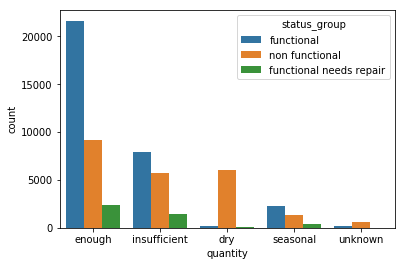

In [29]:
sns.countplot(x='quantity', data=train, hue='status_group') # dry quantity has more nonfunctional water pumps

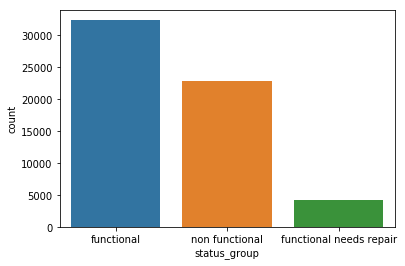

In [30]:
sns.countplot(train.status_group)

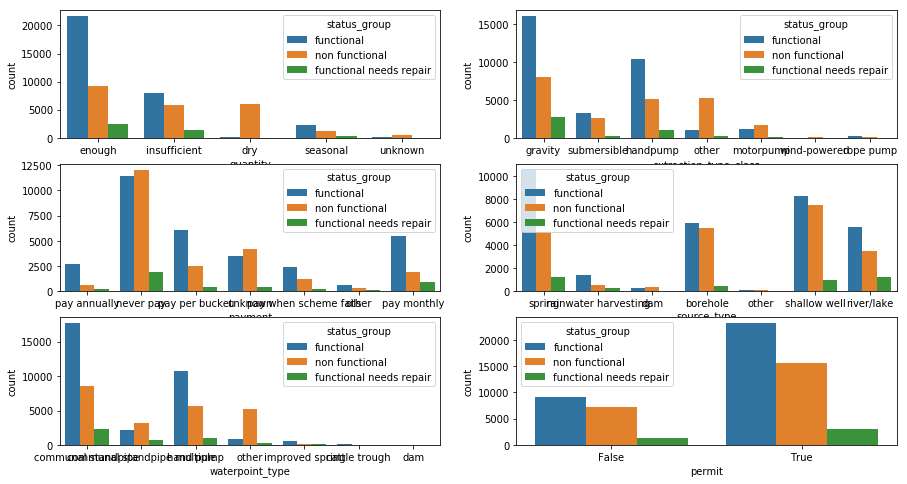

In [31]:
fig, ax = plt.subplots(figsize=(15,8))
plt.subplot(3,2,1)
sns.countplot(x='quantity', data=train, hue='status_group') # dry quantity has more nonfunctional water pumps
#plt.xticks(rotation=-45)
plt.subplot(3,2,2)
sns.countplot(x='extraction_type_class', data=train, hue='status_group') # 
#plt.xlabel('xlabel', fontsize=18)
plt.subplot(3,2,3)
sns.countplot(x='payment', data=train, hue='status_group')
plt.subplot(3,2,4)
sns.countplot(x='source_type', data=train, hue='status_group')
plt.subplot(3,2,5)
sns.countplot(x='waterpoint_type', data=train, hue='status_group')
plt.subplot(3,2,6)
sns.countplot(x='permit', data=train, hue='status_group')
#plt.tight_layout()
plt.show()

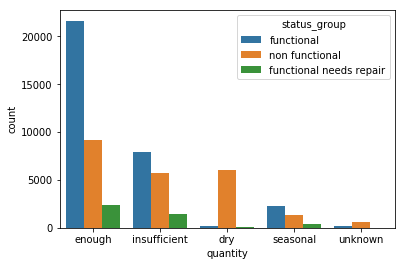

In [32]:


sns.countplot(x='quantity', data=train, hue='status_group') # dry quantity has more nonfunctional water pumps



/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


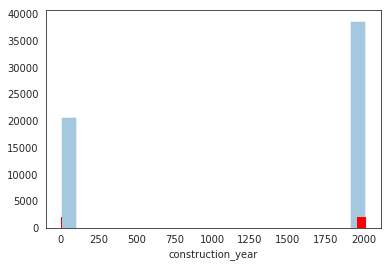

In [33]:
#continous variables:
with sns.axes_style('white'):
    sns.distplot(train.construction_year, hist=True, kde=False, rug=True, rug_kws={"color": "r"})

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


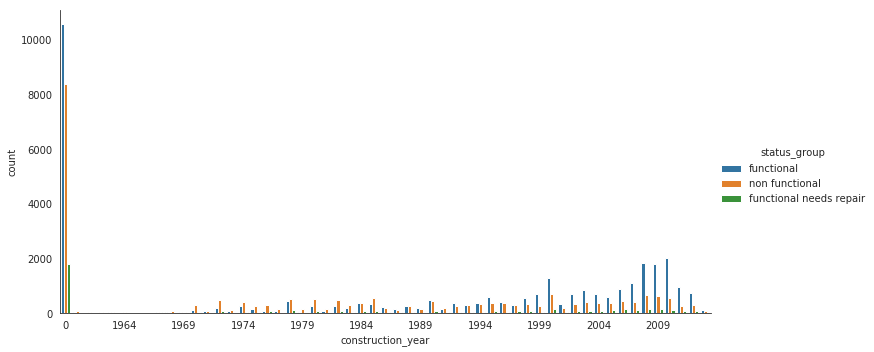

In [34]:
#sns.factorplot("construction_year", train.amount_tsh, train.status_group, data=train, kind="box")
with sns.axes_style('white'):
    g = sns.factorplot("construction_year", data=train, aspect=2, hue='status_group',
                       kind="count")
    g.set_xticklabels(step=5)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


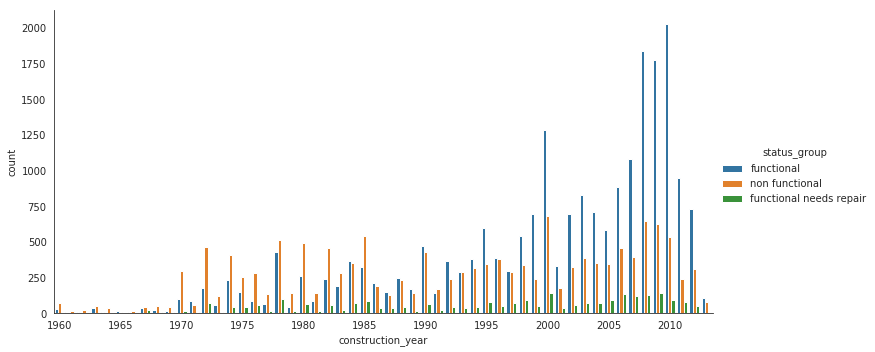

In [44]:
x = train[train['construction_year'] > 0]

with sns.axes_style('white'):
    g = sns.factorplot('construction_year', data=x, aspect=2, hue='status_group',
                       kind="count")
    g.set_xticklabels(step=5)
## The technology is improving and so number of nonfunctional pumps are also less

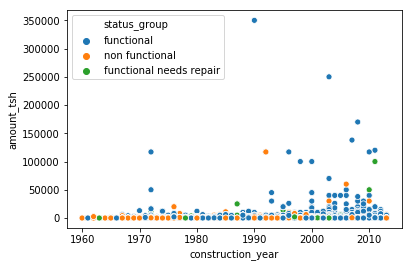

In [45]:
sns.scatterplot(x=x.construction_year, y=x.amount_tsh, hue=x.status_group) #older the pumps more are nonfunctional

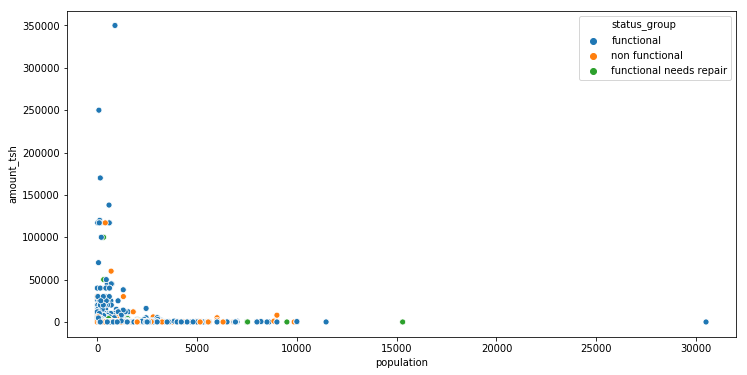

In [46]:
plt.figure(figsize = (12, 6))
sns.scatterplot(x=x.population, y=x.amount_tsh, hue=x.status_group) # as population increases amount of water decreases

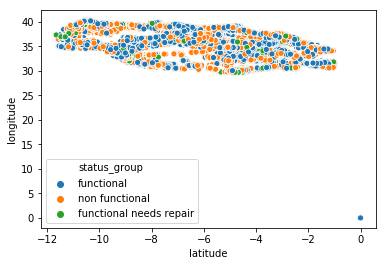

In [47]:
sns.scatterplot(y=train.longitude, x=train.latitude, hue=train.status_group)

## Finding outlier in numerical data column

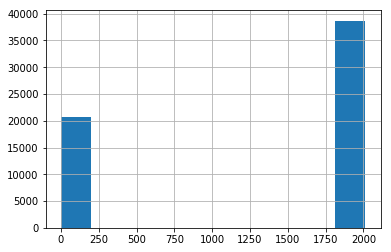

In [35]:
train['construction_year'].hist(bins=10) 

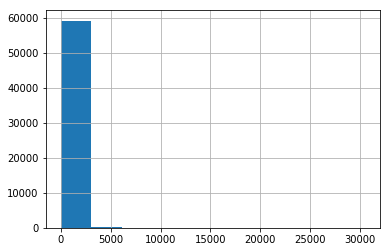

In [36]:
train['population'].hist(bins=10) 

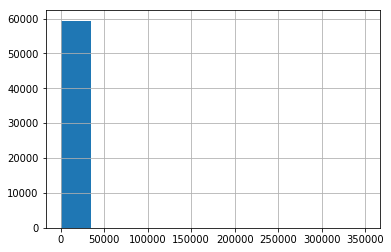

In [37]:
train['amount_tsh'].hist(bins=10) 

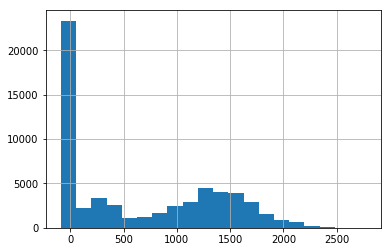

In [38]:
train['gps_height'].hist(bins=20) 

In [39]:
test[num_train_col].isnull().sum()

id                   0
amount_tsh           0
gps_height           0
longitude            0
latitude             0
num_private          0
region_code          0
district_code        0
population           0
construction_year    0
dtype: int64

In [41]:
test[category_train_col[:-1]].isnull().sum().sort_values(ascending=False)

scheme_name              7092
scheme_management         969
installer                 877
funder                    869
public_meeting            821
permit                    737
subvillage                 99
waterpoint_type_group       0
waterpoint_type             0
wpt_name                    0
basin                       0
region                      0
lga                         0
ward                        0
recorded_by                 0
extraction_type             0
extraction_type_group       0
extraction_type_class       0
management                  0
management_group            0
payment                     0
payment_type                0
water_quality               0
quality_group               0
quantity                    0
quantity_group              0
source                      0
source_type                 0
source_class                0
date_recorded               0
dtype: int64

In [42]:
## Filling the missing values with Mode of the respective column
test['funder'].fillna(test['funder'].mode()[0], inplace=True) 
test['installer'].fillna(test['installer'].mode()[0], inplace=True) 
test['subvillage'].fillna(test['subvillage'].mode()[0], inplace=True) 
test['public_meeting'].fillna(test['public_meeting'].mode()[0], inplace=True) 
test['scheme_management'].fillna(test['scheme_management'].mode()[0], inplace=True) 
test['scheme_name'].fillna(test['scheme_name'].mode()[0], inplace=True) 
test['permit'].fillna(test['permit'].mode()[0], inplace=True)

In [43]:
test.isnull().sum().sort_values(ascending=False)

waterpoint_type_group    0
waterpoint_type          0
population               0
ward                     0
lga                      0
district_code            0
region_code              0
region                   0
subvillage               0
basin                    0
num_private              0
wpt_name                 0
latitude                 0
longitude                0
installer                0
gps_height               0
funder                   0
date_recorded            0
amount_tsh               0
public_meeting           0
recorded_by              0
scheme_management        0
payment_type             0
source_class             0
source_type              0
source                   0
quantity_group           0
quantity                 0
quality_group            0
water_quality            0
payment                  0
scheme_name              0
management_group         0
management               0
extraction_type_class    0
extraction_type_group    0
extraction_type          0
c

In [48]:
# outliers/ Anomolies Handling:

train_0 = train[(train.construction_year > 0) & (train.population > 0)]
print("Before : construction year with 0", train.shape)
print("After : Anomalies handling", train_0.shape)



Before : construction year with 0 (59400, 41)
After : Anomalies handling (37344, 41)


In [65]:
test_0=test.drop(['id', 'date_recorded', 'num_private', 'wpt_name', 'scheme_name', 'funder', 'recorded_by', 'installer' ], axis=1)

In [66]:
test_0

,amount_tsh,gps_height,longitude,latitude,basin,subvillage,region,region_code,district_code,lga,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,0.0,1996,35.290799,-4.059696e+00,Internal,Magoma,Manyara,21,3,Mbulu,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,0.0,1569,36.656709,-3.309214e+00,Pangani,Kimnyak,Arusha,2,2,Arusha Rural,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,0.0,1567,34.767863,-5.004344e+00,Internal,Msatu,Singida,13,2,Singida Rural,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,0.0,267,38.058046,-9.418672e+00,Ruvuma / Southern Coast,Kipindimbi,Lindi,80,43,Liwale,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,500.0,1260,35.006123,-1.095041e+01,Ruvuma / Southern Coast,Losonga,Ruvuma,10,3,Mbinga,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
5,0.0,1685,36.685279,-3.302420e+00,Pangani,Masaga,Arusha,2,2,Arusha Rural,...,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
6,0.0,550,36.398041,-7.541382e+00,Rufiji,Kichangani,Iringa,11,7,Kilolo,...,never pay,salty,salty,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
7,0.0,234,39.607420,-1.089379e+01,Ruvuma / Southern Coast,Ilala,Mtwara,9,4,Tandahimba,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
8,30.0,584,39.262951,-1.082359e+01,Ruvuma / Southern Coast,Bondeni,Mtwara,90,33,Newala,...,per bucket,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
9,0.0,1083,37.096108,-3.251754e+00,Pangani,Donyomuruak,Kilimanjaro,3,7,Siha,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [68]:
test_0.shape

(14850, 32)

In [69]:
train_0.shape

(37344, 33)

In [49]:
train_0 = train_0.drop(['id', 'date_recorded', 'num_private', 'wpt_name', 'scheme_name', 'funder', 'recorded_by', 'installer' ], axis=1)

In [50]:
train_0.head()

,amount_tsh,gps_height,longitude,latitude,basin,subvillage,region,region_code,district_code,lga,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,6000.0,1390,34.938093,-9.856322,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,0.0,1399,34.698766,-2.147466,Lake Victoria,Nyamara,Mara,20,2,Serengeti,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,25.0,686,37.460664,-3.821329,Pangani,Majengo,Manyara,21,4,Simanjiro,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,0.0,263,38.486161,-11.155298,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
5,20.0,0,39.172796,-4.765587,Pangani,Moa/Mwereme,Tanga,4,8,Mkinga,...,salty,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe,functional


In [51]:
train_0.isnull().sum()

amount_tsh               0
gps_height               0
longitude                0
latitude                 0
basin                    0
subvillage               0
region                   0
region_code              0
district_code            0
lga                      0
ward                     0
population               0
public_meeting           0
scheme_management        0
permit                   0
construction_year        0
extraction_type          0
extraction_type_group    0
extraction_type_class    0
management               0
management_group         0
payment                  0
payment_type             0
water_quality            0
quality_group            0
quantity                 0
quantity_group           0
source                   0
source_type              0
source_class             0
waterpoint_type          0
waterpoint_type_group    0
status_group             0
dtype: int64

In [52]:
train_not_missing_dummies = pd.get_dummies(train_0.drop('status_group', axis=1))
train_not_missing_dummies.shape

(37344, 13409)

In [53]:
X = train_0.drop('status_group', axis=1)
y = train_0.status_group

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [55]:
categorical_features_indices = np.where(X.dtypes == np.object )[0]
categorical_features_indices


array([ 4,  5,  6,  9, 10, 13, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31])

## We are going to use CatBoost as it is wonderfull algorithm to handle categorical datatype and doesnot need it to get processed

In [56]:
from catboost import CatBoostClassifier

clf = CatBoostClassifier(random_seed=42, learning_rate=0.001, iterations=50, loss_function='MultiClass', eval_metric='Accuracy')

clf.fit(X_train, y_train, cat_features=categorical_features_indices, verbose=400, eval_set=(X_test, y_test), plot=True)
preds = clf.predict_proba(X_test)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.7177908	test: 0.7224528	best: 0.7224528 (0)	total: 230ms	remaining: 11.3s
49:	learn: 0.7280000	test: 0.7318249	best: 0.7381176 (2)	total: 7.99s	remaining: 0us

bestTest = 0.7381175526
bestIteration = 2

Shrink model to first 3 iterations.


In [57]:
y_pred = clf.predict(X_test)
X_pred = clf.predict(X_train)

from sklearn.metrics import accuracy_score 


print ("Accuracy TEST: ", accuracy_score(y_test,y_pred)*100)
print ("Accuracy Train: ", accuracy_score(y_train,X_pred)*100)

Accuracy TEST:  73.81175525505422
Accuracy Train:  73.18828451882845


In [59]:
y_pred[:5]

array([['non functional'],
       ['functional'],
       ['non functional'],
       ['functional'],
       ['functional']], dtype='<U14')

## We will try some more tuning for getting 

In [60]:
fast_model = CatBoostClassifier(
    random_seed=63,
    iterations=150,
    learning_rate=0.01,
    boosting_type='Plain',
    bootstrap_type='Bernoulli',
    subsample=0.5,
    one_hot_max_size=20,
    rsm=0.5,
    leaf_estimation_iterations=5,
    max_ctr_complexity=1,loss_function='MultiClass', eval_metric='Accuracy')

fast_model.fit(
    X_train, y_train,
    cat_features=categorical_features_indices,
    eval_set=(X_test, y_test),
    verbose=False,
    plot=True
)
y_pred = fast_model.predict(X_test)
X_pred = fast_model.predict(X_train)

print ("Accuracy TEST: ", accuracy_score(y_test,y_pred)*100)
print ("Accuracy Train: ", accuracy_score(y_train,X_pred)*100)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Accuracy TEST:  75.36484134422278
Accuracy Train:  76.23430962343096


In [61]:
tunned_model = CatBoostClassifier(
    random_seed=63,
    iterations=1000,
    learning_rate=0.03,
    l2_leaf_reg=3,
    bagging_temperature=1,
    random_strength=1,
    one_hot_max_size=2,
    leaf_estimation_method='Newton', loss_function='MultiClass', eval_metric='Accuracy'
    
)
tunned_model.fit(
    X_train, y_train,
    cat_features=categorical_features_indices,
    verbose=False,
    eval_set=(X_train, y_train),
    plot=True
)
y_pred = tunned_model.predict(X_test)
X_pred = tunned_model.predict(X_train)

print ("Accuracy TEST: ", accuracy_score(y_test,y_pred)*100)
print ("Accuracy Train: ", accuracy_score(y_train,X_pred)*100)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Accuracy TEST:  81.16213683223992
Accuracy Train:  86.81506276150628


In [62]:
best_model = CatBoostClassifier(
    random_seed=63,
    iterations=int(tunned_model.tree_count_ * 1.2),loss_function='MultiClass', eval_metric='Accuracy'
)
best_model.fit(
    X, y,
    cat_features=categorical_features_indices,
    verbose=100, plot=True, eval_set=(X_train, y_train)
)
y_pred = best_model.predict(X_test)
X_pred = best_model.predict(X_train)

print ("Accuracy TEST: ", accuracy_score(y_test,y_pred)*100)
print ("Accuracy Train: ", accuracy_score(y_train,X_pred)*100)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.7177057	test: 0.7220753	best: 0.7220753 (0)	total: 1.13s	remaining: 22m 8s
100:	learn: 0.7791613	test: 0.8106109	best: 0.8106109 (100)	total: 1m 56s	remaining: 20m 44s
200:	learn: 0.7903278	test: 0.8382259	best: 0.8384268 (198)	total: 3m 51s	remaining: 18m 42s
300:	learn: 0.7956298	test: 0.8468285	best: 0.8468285 (300)	total: 5m 59s	remaining: 17m 26s
400:	learn: 0.8007712	test: 0.8536569	best: 0.8536569 (400)	total: 7m 51s	remaining: 15m 13s
500:	learn: 0.8042524	test: 0.8601172	best: 0.8601172 (500)	total: 9m 45s	remaining: 13m 11s
600:	learn: 0.8069302	test: 0.8630293	best: 0.8630293 (599)	total: 11m 46s	remaining: 11m 18s
700:	learn: 0.8097419	test: 0.8648033	best: 0.8648703 (697)	total: 13m 43s	remaining: 9m 20s
800:	learn: 0.8116699	test: 0.8665105	best: 0.8665105 (800)	total: 15m 46s	remaining: 7m 25s
900:	learn: 0.8132230	test: 0.8676151	best: 0.8677490 (895)	total: 17m 49s	remaining: 5m 28s
1000:	learn: 0.8146690	test: 0.8687531	best: 0.8687531 (999)	total: 19m 50s

In [63]:
submission=pd.DataFrame()
submission['id']=test['id']

In [71]:
y_f_pred=best_model.predict(test_0)

In [72]:
submission['status_group']=y_f_pred

In [73]:
submission.to_csv('submission.csv')